In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Advanced Goals (Report)

    1.) Get the degrees of separation for 1000 random pages. Find the median degree of separation as well as the distribution.
    
    2.) Considering your results, and the size of the English Wikipedia, estimate how many pages there are of degree 6.
    
    3.) Try a foreign language Wikipedia. Following the same rules above, determine the network structure. 
    Is there is a page a page that all others tend to lead back to? 
    Does it tend to loop more? 
    In any case, are the degrees generally shorter/longer?

# Loading the data

In [10]:
# Path to the folder containing the CSV files
folder_path = 'en_conso'

# List to hold individual DataFrames
dfs = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        # Read the CSV file into a DataFrame
        file_path = os.path.join(folder_path, filename)
        df = pd.read_csv(file_path)
        
        # Append the DataFrame to the list
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df = df.drop_duplicates()
del dfs
display(df.shape)
df.head()

(2299, 4)

,Start,DoS,Path,Msg
0,/wiki/Sibon_ayerbeorum,17.0,['https://en.wikipedia.org/wiki/Sibon_ayerbeor...,NaN
1,/wiki/William_Kassebaum,10.0,['https://en.wikipedia.org/wiki/William_Kasseb...,NaN
2,/wiki/Miss_Bonaire,21.0,"['https://en.wikipedia.org/wiki/Miss_Bonaire',...",NaN
3,/wiki/Eric_Curry,24.0,"['https://en.wikipedia.org/wiki/Eric_Curry', '...",NaN
4,/wiki/1955_Nauruan_Local_Government_Council_el...,20.0,['https://en.wikipedia.org/wiki/1955_Nauruan_L...,NaN


# Plotting the distribution of Degrees of Separation

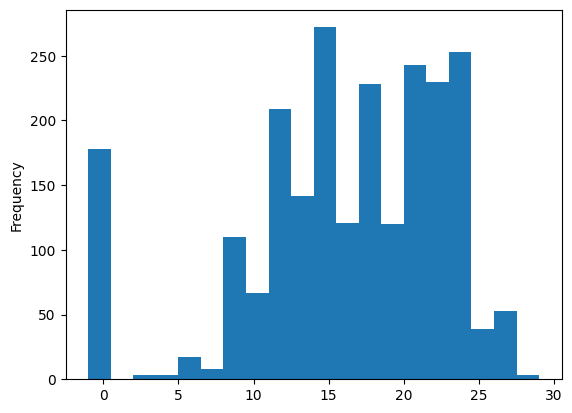

In [11]:
df['DoS'].plot(kind="hist", bins=20);

# Median of the DoS

In [12]:
display(df['DoS'].median())

17.0

# Percentage of DoS=6

In [13]:
df.query('DoS == 6')

,Start,DoS,Path,Msg
35,/wiki/Simplicial_commutative_ring,6.0,['https://en.wikipedia.org/wiki/Simplicial_com...,NaN
151,/wiki/Tosio_Kato,6.0,"['https://en.wikipedia.org/wiki/Tosio_Kato', '...",NaN
249,/wiki/Being_There_(novel),6.0,['https://en.wikipedia.org/wiki/Being_There_(n...,NaN
413,/wiki/Double_wedge,6.0,"['https://en.wikipedia.org/wiki/Double_wedge',...",NaN
460,/wiki/Pregaussian_class,6.0,['https://en.wikipedia.org/wiki/Pregaussian_cl...,NaN
646,/wiki/Dehn_plane,6.0,"['https://en.wikipedia.org/wiki/Dehn_plane', '...",NaN
654,/wiki/Alfred_Proksch_(politician),6.0,['https://en.wikipedia.org/wiki/Alfred_Proksch...,NaN
664,/wiki/Johannes_Runnenburg,6.0,['https://en.wikipedia.org/wiki/Johannes_Runne...,NaN
721,/wiki/Algorithmic_paradigm,6.0,['https://en.wikipedia.org/wiki/Algorithmic_pa...,NaN
731,/wiki/Observation_balloon,6.0,['https://en.wikipedia.org/wiki/Observation_ba...,NaN


In [18]:
pct_dos6 = len(df.query('DoS == 6')) / len(df) * 100
print(f"{round(pct_dos6, 2)}% of our sample has DoS = 6.")

0.7% of our sample has DoS = 6.


According to [Wikipedia](https://en.wikipedia.org/wiki/Wikipedia:Size_of_Wikipedia), there are 6,823,122 English Wiki articles as of May 2024. According to our results, only 0.31% of Wiki Articles have $DoS = 6$ to the Philosophy page. We estimate around 31.5K articles having DoS=6 in English Wikipedia.

In [20]:
print(f"Estimation of the num of articles with DoS = 6: {round(6823122 * pct_dos6 / 100, 2)}")

Estimation of the num of articles with DoS = 6: 47485.84
